# Spaceship Titanic

Ахметкин Олег Вадимович, 306 группа

Разведочный анализ данных датасета спейсшип титаник

## Initial

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import random
from collections import Counter
sns.set() 

In [2]:
train = pd.read_csv('./train.csv', index_col='PassengerId')
test = pd.read_csv('./test.csv', index_col='PassengerId')

In [3]:
train.head()

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
PassengerId,,,,,,,,,,,,,
0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


- PassengerId - A unique Id for each passenger. Each Id takes the form gggg_pp where gggg indicates a group the passenger is travelling with and pp is their number within the group. People in a group are often family members, but not always.

- HomePlanet - The planet the passenger departed from, typically their planet of permanent residence.

- CryoSleep - Indicates whether the passenger elected to be put into suspended animation for the duration of the voyage. Passengers in cryosleep are confined to their cabins.

- Cabin - The cabin number where the passenger is staying. Takes the form deck/num/side, where side can be either P for Port or S for Starboard.

- Destination - The planet the passenger will be debarking to.
- Age - The age of the passenger.
- VIP - Whether the passenger has paid for special VIP service during the voyage.
- RoomService, FoodCourt, ShoppingMall, Spa, VRDeck - Amount the passenger has billed at each of the Spaceship Titanic's many luxury amenities.
- Name - The first and last names of the passenger.
- Transported - Whether the passenger was transported to another dimension. This is the target, the column you are trying to predict.

In [4]:
train.shape

(8693, 13)

In [5]:
train.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


In [6]:
train.describe(include=['O'])

,HomePlanet,CryoSleep,Cabin,Destination,VIP,Name
count,8492,8476,8494,8511,8490,8493
unique,3,2,6560,3,2,8473
top,Earth,False,G/734/S,TRAPPIST-1e,False,Gollux Reedall
freq,4602,5439,8,5915,8291,2


In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8693 entries, 0001_01 to 9280_02
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   HomePlanet    8492 non-null   object 
 1   CryoSleep     8476 non-null   object 
 2   Cabin         8494 non-null   object 
 3   Destination   8511 non-null   object 
 4   Age           8514 non-null   float64
 5   VIP           8490 non-null   object 
 6   RoomService   8512 non-null   float64
 7   FoodCourt     8510 non-null   float64
 8   ShoppingMall  8485 non-null   float64
 9   Spa           8510 non-null   float64
 10  VRDeck        8505 non-null   float64
 11  Name          8493 non-null   object 
 12  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(6)
memory usage: 891.4+ KB


есть пропущенные значения

In [8]:
train.isnull().sum()

HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

## Dependencies between Features and Transported 

In [9]:
transported = train[train['Transported'] == 1]
not_transported = train[train['Transported'] == 0]

print("Transported: %i (%.1f%%)" %(len(transported), (len(transported)/len(train)*100)))
print("Not transported: %i (%.1f%%)" %(len(not_transported), (len(not_transported)/len(train)*100)))
print("Total:", len(train))

Transported: 4378 (50.4%)
Not transported: 4315 (49.6%)
Total: 8693


### Home Planet vs. Transported
Passengers from Europe are more likely to survive

In [10]:
train['HomePlanet'].value_counts()

HomePlanet
Earth     4602
Europa    2131
Mars      1759
Name: count, dtype: int64

In [11]:
train.groupby('HomePlanet').Transported.value_counts()

HomePlanet  Transported
Earth       False          2651
            True           1951
Europa      True           1404
            False           727
Mars        True            920
            False           839
Name: count, dtype: int64

In [12]:
train[['HomePlanet', 'Transported']].groupby('HomePlanet', as_index=False).mean()

,HomePlanet,Transported
0,Earth,0.423946
1,Europa,0.658846
2,Mars,0.523024


/var/folders/mk/hj8c66xx7p9_nsjthv7t_ftm0000gn/T/ipykernel_38831/1696645268.py:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='HomePlanet', y='Transported', data=train, ci=None)


<Axes: xlabel='HomePlanet', ylabel='Transported'>

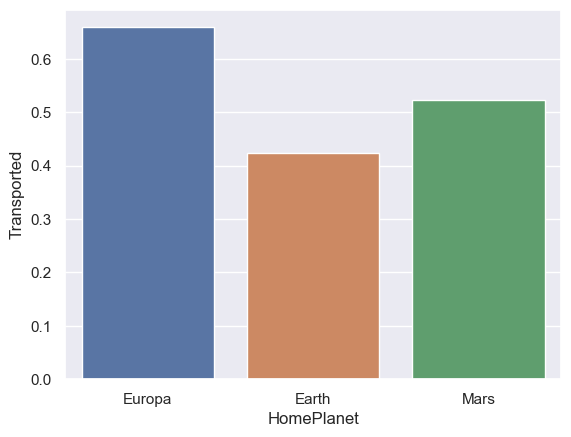

In [13]:
sns.barplot(x='HomePlanet', y='Transported', data=train, ci=None)

### CryoSleep vs. Transported
 Passengers in cryosleep are more likely to survive

In [14]:
train.CryoSleep.value_counts()

CryoSleep
False    5439
True     3037
Name: count, dtype: int64

In [15]:
train.groupby('CryoSleep').Transported.value_counts()

CryoSleep  Transported
False      False          3650
           True           1789
True       True           2483
           False           554
Name: count, dtype: int64

In [16]:
train[['CryoSleep', 'Transported']].groupby('CryoSleep', as_index=False).mean()

,CryoSleep,Transported
0,False,0.328921
1,True,0.817583


<Axes: xlabel='CryoSleep', ylabel='Transported'>

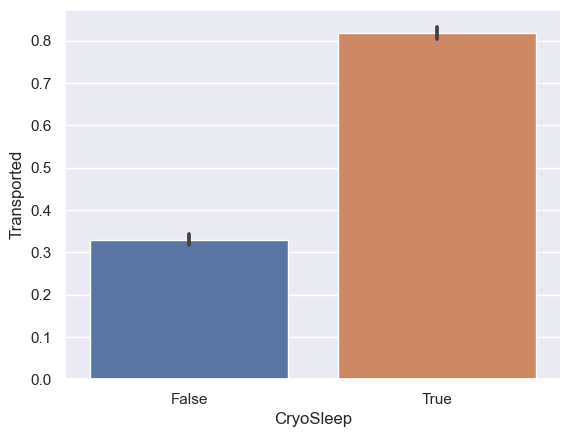

In [17]:
sns.barplot(x='CryoSleep', y='Transported', data=train)

### VIP vs. Transported
Passengers without VIP status have a better chance of survival

In [18]:
train.VIP.value_counts()

VIP
False    8291
True      199
Name: count, dtype: int64

In [19]:
train.groupby('VIP').Transported.value_counts()

VIP    Transported
False  True           4198
       False          4093
True   False           123
       True             76
Name: count, dtype: int64

In [20]:
train[['VIP', 'Transported']].groupby(['VIP'], as_index=False).mean()

,VIP,Transported
0,False,0.506332
1,True,0.381910


<Axes: xlabel='VIP', ylabel='Transported'>

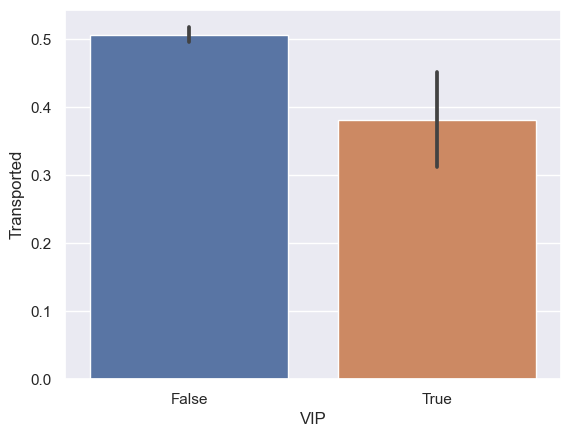

In [21]:
sns.barplot(x='VIP', y='Transported', data=train)

The VIP column does not greatly affect transportation

### HomePlanet & CryoSpleep vs. Transported


CryoSleep   False  True 
HomePlanet              
Earth        3106   1382
Europa       1162    911
Mars         1047    669


Text(0, 0.5, 'Percentage')

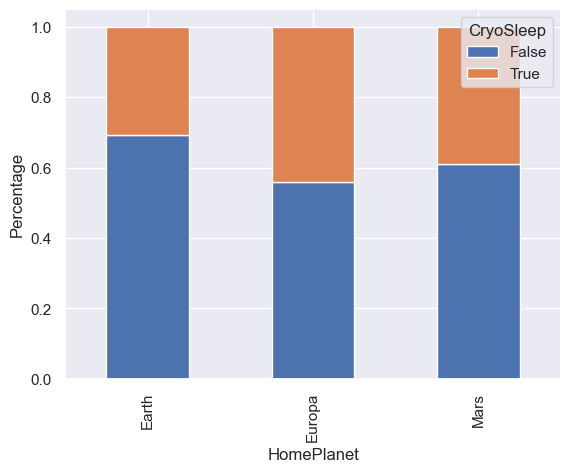

In [22]:
tab = pd.crosstab(train['HomePlanet'], train['CryoSleep'])
print (tab)

tab.div(tab.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
plt.xlabel('HomePlanet')
plt.ylabel('Percentage')

/Users/ktann/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


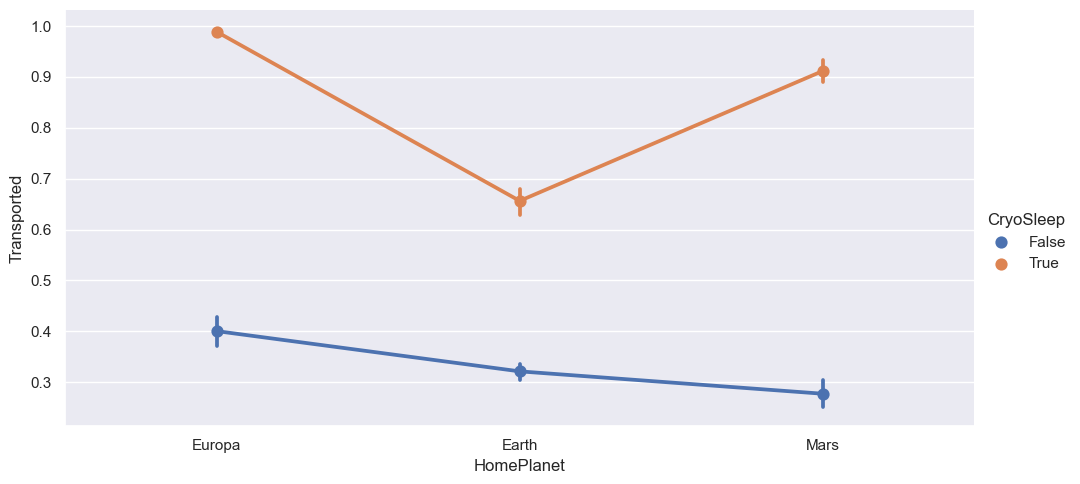

In [23]:
sns.catplot(x='HomePlanet', y='Transported', hue='CryoSleep', aspect=2, data=train, kind='point')

- Passengers in cryosleep from Europa have almost 100% chance of transportation
- Passengers who are not in cryosleep and from Mars have the lowest probability of transportation

### Destination vs. Transported
Passengers who flew in 55 Cancri e have a great chance of transportation

In [24]:
train.Destination.value_counts()

Destination
TRAPPIST-1e      5915
55 Cancri e      1800
PSO J318.5-22     796
Name: count, dtype: int64

<Axes: xlabel='Destination', ylabel='Transported'>

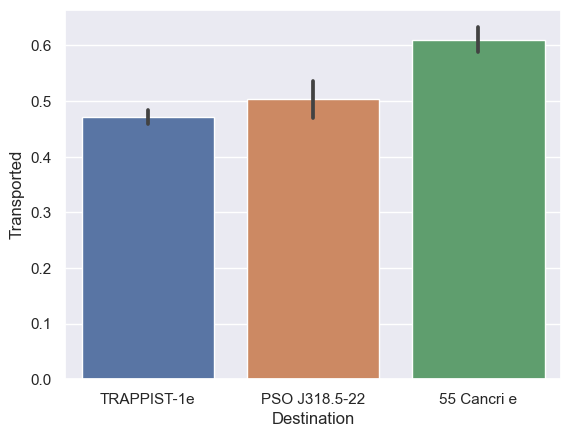

In [25]:
sns.barplot(x='Destination', y='Transported', data=train)

### Age vs. Transported

<Axes: xlabel='VIP', ylabel='Age'>

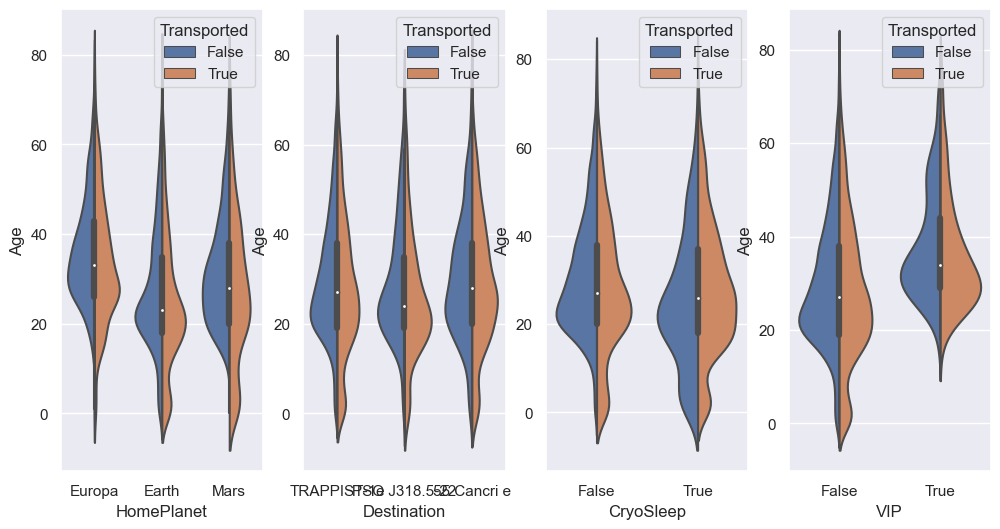

In [26]:
fig = plt.figure(figsize=(12,6))
ax1 = fig.add_subplot(141)
ax2 = fig.add_subplot(142)
ax3 = fig.add_subplot(143)
ax4 = fig.add_subplot(144)


sns.violinplot(x="HomePlanet", y="Age", hue="Transported", data=train, split=True, ax=ax1)
sns.violinplot(x="Destination", y="Age", hue="Transported", data=train, split=True, ax=ax2)
sns.violinplot(x="CryoSleep", y="Age", hue="Transported", data=train, split=True, ax=ax3)
sns.violinplot(x="VIP", y="Age", hue="Transported", data=train, split=True, ax=ax4)

/var/folders/mk/hj8c66xx7p9_nsjthv7t_ftm0000gn/T/ipykernel_38831/3584516129.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(total_transported['Age'].dropna().values, bins=range(0, 81, 1), kde=False, color='blue', ax = ax1)
/var/folders/mk/hj8c66xx7p9_nsjthv7t_ftm0000gn/T/ipykernel_38831/3584516129.py:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.

<Axes: xlabel='Not sleep'>

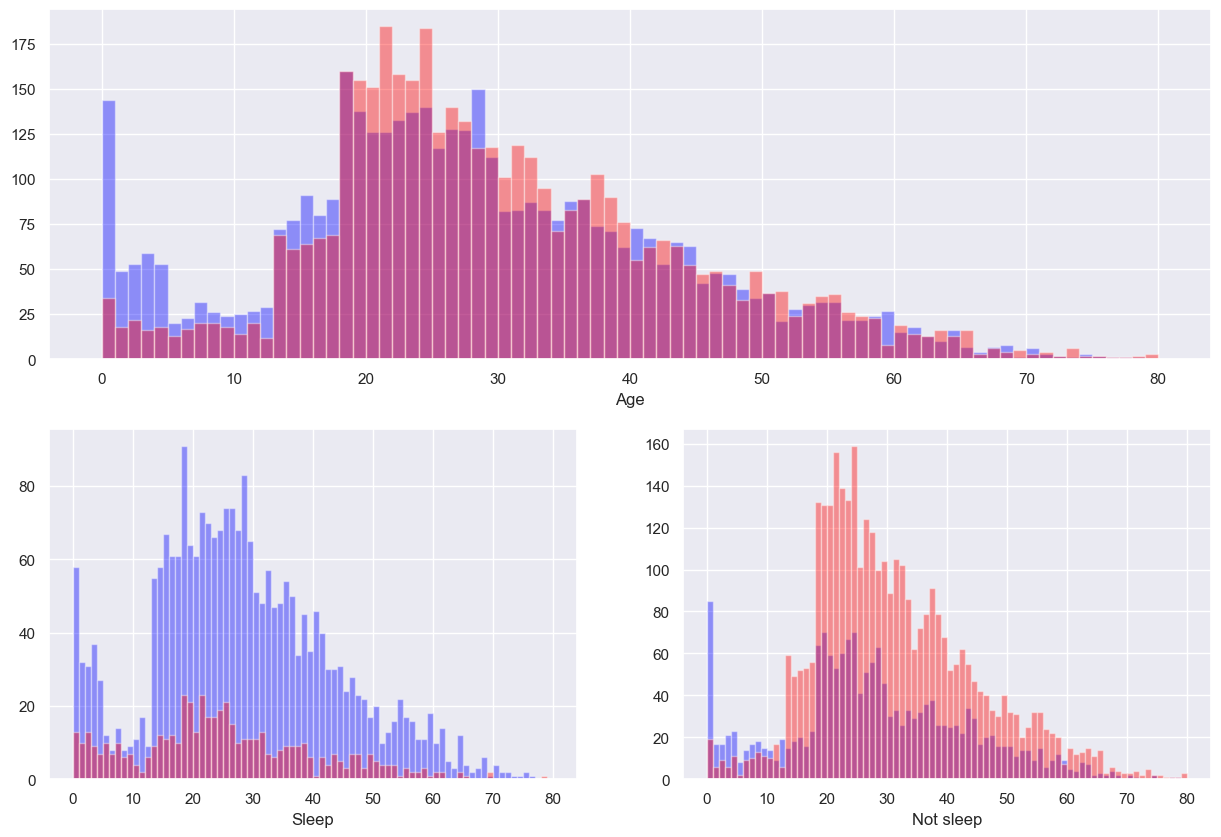

In [27]:
total_transported = train[train['Transported']==1]
total_not_transported = train[train['Transported']==0]
sleep_transported = train[(train['Transported']==1) & (train['CryoSleep']==1)]
not_sleep_transported = train[(train['Transported']==1) & (train['CryoSleep']==0)]
sleep_not_transported = train[(train['Transported']==0) & (train['CryoSleep']==1)]
not_sleep_not_transported = train[(train['Transported']==0) & (train['CryoSleep']==0)]

fig = plt.figure(figsize=[15,10])
ax1 = fig.add_subplot(211)
sns.distplot(total_transported['Age'].dropna().values, bins=range(0, 81, 1), kde=False, color='blue', ax = ax1)
sns.distplot(total_not_transported['Age'].dropna().values, bins=range(0, 81, 1), kde=False, color='red', axlabel='Age', ax = ax1)

ax2 = fig.add_subplot(223)
sns.distplot(sleep_transported['Age'].dropna().values, bins=range(0, 81, 1), kde=False, color='blue', ax = ax2)
sns.distplot(sleep_not_transported['Age'].dropna().values, bins=range(0, 81, 1), kde=False, color='red', axlabel='Sleep', ax = ax2)

ax3 = fig.add_subplot(224)
sns.distplot(not_sleep_transported['Age'].dropna().values, bins=range(0, 81, 1), kde=False, color='blue', ax=ax3)
sns.distplot(not_sleep_not_transported['Age'].dropna().values, bins=range(0, 81, 1), kde=False, color='red', axlabel='Not sleep', ax=ax3)

People who slept between the ages of 15 and 30 were transported the most